<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Исследование регионов нефтедобычи добывающей компании «ГлавРосГосНефть».
---
В исследовании рассмотрены данные проб нефти в трёх регионах, где измерили качество нефти и объём её запасов. Построена модель машинного обучения для определения региона, где добыча принесёт наибольшую прибыль. Проанализированы возможная прибыль и риски техникой *Bootstrap.*

---
#### Описание данных
Признаки:
id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек.

Целевой признак:
- product

---
<a id='the_contents'></a>
#### Исследование состоит из 5 частей.

##### Часть 1. Загрузка и подготовка данных.
* [1.1 Импорт библиотек.](#the_part_1.1)
* [1.2 Загрузка файла.](#the_part_1.2)
* [1.3 Изучение общей информации.](#the_part_1.3)
* [1.4 Разделение данных на обучающую и валидационную выборки.](#the_part_1.4)
* [1.5 Масштабирование данных.](#the_part_1.5)

##### Часть 2. Обучение и проверка модели.
* [2.1 Обучение модели и предсказания на валидационной выборке.](#the_part_2.1)

##### Часть 3. Подготовка к расчету прибыли.
* [3.1. Подготовка к расчету прибыли.](#the_part_3.1)

##### Часть 4. Расчёт прибыли и рисков.
* [4.1. Расчёт прибыли.](#the_part_4.1)
* [4.2. Расчет рисков и прибыли для каждого региона.](#the_part_4.2)

##### Часть 5. Заключение.
* [Выводы по исследованию.](#the_part_5)
---

# Часть1. Загрузка и подготовка данных

<a id='the_part_1.1'></a>
### 1.1. Импорт библиотек, загрузка файла, изучение общей информации.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error

<a id='the_part_1.2'></a>
### 1.2. Загрузка файла.

In [2]:
# Загружаем файл данных
try:
    df_r1 = pd.read_csv('https://C:/datasets/geo_data_0.csv')
    df_r2 = pd.read_csv('https://C:/datasets/geo_data_1.csv')
    df_r3 = pd.read_csv('https://C:/datasets/geo_data_2.csv')
except:
    df_r1 = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект6\geo_data_0.csv')
    df_r2 = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект6\geo_data_1.csv')
    df_r3 = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект6\geo_data_2.csv')

<a id='the_part_1.3'></a>
### 1.3. Изучение общей информации.

In [3]:
# Общая информация
regs = [df_r1, df_r2, df_r3]

for i in range(len(regs)):
    display(regs[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
# Посмотрим на датасет
for i in range(len(regs)):
    display(regs[i].head(2))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


In [5]:
# Общая статистика по числовым данным
for i in range(len(regs)):
    display(regs[i].describe().T)

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5064d9eb90>,
      dtype=object)

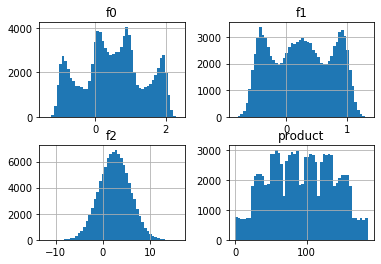

In [6]:
# Посмотрим распределение данных
regs[0].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5062224550>,
      dtype=object)

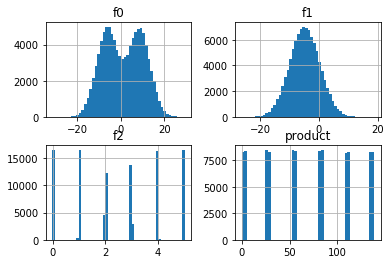

In [7]:
# Посмотрим распределение данных
regs[1].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f506165e5d0>,
      dtype=object)

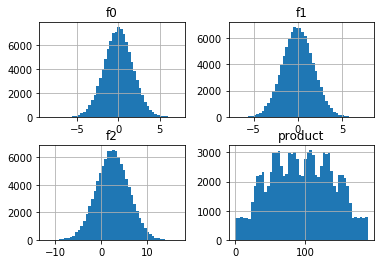

In [8]:
# Посмотрим распределение данных
regs[2].hist(bins=50)

In [9]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

In [10]:
# Выполним поиск пропущенных данных
for i in range(len(regs)):
    display(missing_data(regs[i]))

,Total missing data,Percent missing data
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


,Total missing data,Percent missing data
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


,Total missing data,Percent missing data
product,0,0.0
f2,0,0.0
f1,0,0.0
f0,0,0.0
id,0,0.0


In [11]:
# Поиск дубликатов
print('Дубликаты \nРегион 1:', regs[0].duplicated().sum(), 
      '\nРегион 2:', regs[1].duplicated().sum(),
      '\nРегион 3:', regs[2].duplicated().sum()) 

Дубликаты 
Регион 1: 0 
Регион 2: 0 
Регион 3: 0


In [12]:
# Построим матрицы корреляции
for i in range(len(regs)):
    display(regs[i].corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


### Выводы
- Данные корректны, без пропусков, без дубликатов.
- Большая часть данных имеет распределение не в соответствии с нормальным законом распределения.
- Часть признаков достаточно значительно коррелируют между собой и с целевым признаком.
- В регионе 2 признак `f2` очень сильно коррелирует с целевым признаком, коэффициент корреляции 0,99.

<a id='the_part_1.4'></a>
### 1.4. Разделение данных на обучающую и валидационную выборки.

Удалим признак не имеющий значимости

In [13]:
# Удаляем лишнее
regs = [df_r1, df_r2, df_r3]

def dropid(r):
    for i in range(len(r)):
        r[i] = r[i].drop('id', axis=1)
    return r

all_df = dropid(regs)

Выделим признаки и целевой признак, разделим выборку на на обучающую-валидационную в соотношении 75%-25%

In [14]:
# Выделяем признаки из набора данных
def getfut(r):
    for i in range(len(r)):
        r[i] = r[i].drop('product', axis=1)
    return r

dfs = all_df.copy()
all_features = getfut(dfs)

# Выделяем целевой признак
def gettar(r):
    for i in range(len(r)):
        r[i] = r[i]['product']
    return r

dfs = all_df.copy()
all_targets = gettar(dfs)

# Делим данные на обучающую-валидационную выборки в соотношении 75%-25%
def split_tts(fr, tr):
    all_ft = []
    all_fv = []
    all_tt = []
    all_tv = []
    for i in range(len(fr)):
        features_train, features_valid, target_train, target_valid = train_test_split(
        fr[i], tr[i], test_size=0.25, random_state=12345)
        
        all_ft.append(features_train)
        all_fv.append(features_valid)
        all_tt.append(target_train)
        all_tv.append(target_valid)
        
    return all_ft, all_fv, all_tt, all_tv

all_features_train, all_features_valid, all_target_train, all_target_valid = split_tts(all_features, all_targets)

<a id='the_part_1.5'></a>
### 1.5. Масштабирование данных.

Стандартизируем числовые признаки.

In [15]:
# Признаки с числовыми данными
numeric = ['f0', 'f1', 'f2']

# Функция стандартизации
def make_ss(ft, fv):
    for i in range(len(ft)):
        scaler.fit(ft[i][numeric])
        ft[i].loc[:, numeric] = scaler.transform(ft[i][numeric])
        fv[i].loc[:, numeric] = scaler.transform(fv[i][numeric])
    return

# Выполнение стандартизации
scaler = StandardScaler()
make_ss(all_features_train, all_features_valid)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/py

[<span style="color:green"> Возврат к оглавлению</span>](#the_contents)

# Часть 2. Обучение и проверка модели

<a id='the_part_2.1'></a>
### 2.1. Обучение модели и предсказания на валидационной выборке.

Создадим модель линейной регрессии, обучим и сделаем предсказание по валидационной выборке для каждого региона.

In [16]:
# Создание модели линейной регрессии, обучение и предсказания
all_model = []
all_predict = []

for i in range(len(all_features_train)):
    all_model.append(lm.LinearRegression())
    all_model[i].fit(all_features_train[i], all_target_train[i])
    all_predict.append(all_model[i].predict(all_features_valid[i]))

Рассчитаем средний запас предсказанного сырья и RMSE модели для каждого региона

In [17]:
# Печать заголовка
print("         Средний запас предсказанного сырья, тыс. бар. | RMSE")

# Печать вычисленных значений в цикле
for i in range (len(all_target_valid)):
    print("Регион {}:{:^45.2f} | {:.2f}".format(
        i+1,
        all_predict[i].mean(),
        mean_squared_error(all_target_valid[i], all_predict[i]) ** 0.5))

         Средний запас предсказанного сырья, тыс. бар. | RMSE
Регион 1:                    92.59                     | 37.58
Регион 2:                    68.73                     | 0.89
Регион 3:                    94.97                     | 40.03


### Выводы
- В регионе 1 и 3 средние предсказанные запасы сырья превышают 90 тыс. баррелей, при этом имеют большой разброс значений - корень среднеквадратичной ошибки 37,6 и 40 соответственно.
- Регион 2 имеет меньший средний предсказанный запас, около 69 тыс. баррелей, но при этом значительно меньший разброс значений - RMSE меньше единицы.

[<span style="color:green"> Возврат к оглавлению</span>](#the_contents)

# Часть 3. Подготовка к расчёту прибыли

<a id='the_part_3.1'></a>
### 3.1. Подготовка к расчету прибыли.

Сохраним основные значения для расчетов и рассчитаем объём сырья для безубыточной разработки новой скважины.

In [18]:
# Создадим переменные и сохраним в них основные значения
budget_reg = 10_000_000_000 # Бюджет на разработку в регионе
n_point_sel = 200 # Количество скважин для расчета прибыли
price_unit_prod = 450*1000 # Доход с единицы продукта

In [19]:
profit_level = budget_reg / n_point_sel / price_unit_prod
print('Объём сырья для безубыточной разработки новой скважины', round(profit_level, 2), 'тыс. баррелей')

Объём сырья для безубыточной разработки новой скважины 111.11 тыс. баррелей


### Выводы
- Средние предсказанные моделью объемы сырья в каждом регионе меньше уровня безубыточности разработки скважины.
- Необходимо выбирать лучшие скважины.

[<span style="color:green"> Возврат к оглавлению</span>](#the_contents)

# Часть 4. Расчёт прибыли и рисков 

<a id='the_part_4.1'></a>
### 4.1. Расчет прибыли.

Создадим функцию расчета прибыли

In [20]:
# Функция расчета прибыли
def profit0(true, predict, count, price, cost):
    selected = predict.sort_values(ascending=False)[:count] # Выбираем № лучших скважин из предсказаний
    true_sel = true[selected.index] # Определяем соответствующие предсказаниям целевые значения сырья
    prof = price * true_sel.sum() - cost # Вычисляем размер прибыли
    return prof

In [21]:
#РЕКОМЕНДУЮТ ОТБИРАТЬ 200 ЛУЧШИХ ИЗ ТАРГЕТА.

# Функция расчета прибыли
def profit(true, predict, count, price, cost):
    selected = predict.sort_values(ascending=False) 
    true_sel = true[selected.index][:count] # Определяем соответствующие предсказаниям целевые значения сырья # Выбираем № лучших скважин из предсказаний
    prof = price * true_sel.sum() - cost # Вычисляем размер прибыли
    return prof

<a id='the_part_4.2'></a>
### 4.2. Расчет рисков и прибыли для каждого региона.

In [22]:
# Переведем данные предсказаний в нужный формат
for i in range(len(all_predict)):
    all_predict[i] = pd.DataFrame(all_predict[i], index=all_target_valid[i].index, columns=['0'])['0']

Расчитаем риски и прибыли для каждого региона с помощью техники Bootstrap на 1000 выборок.

In [23]:
# В цикле выберем 500 значений из всех предсказанных моделью и вызовем функцию расчета прибыли
state = np.random.RandomState(123)

all_values_profit = []

for i in range(len(all_target_valid)):
    values_profit = []
    for _ in range(1000):
        predict_500 = all_predict[i].sample(n=500, replace=True, random_state=state)
        values_profit.append(profit(all_target_valid[i], predict_500, n_point_sel, price_unit_prod, budget_reg))
    
    all_values_profit.append(pd.Series(values_profit))

Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков для каждого региона.

In [24]:
# Печать заголовка
print("         Средняя прибыль, млн.руб. | 95% доверительный интервал, млн.руб. | Риск убытков, %")

# Расчет и печать значений в цикле
for i in range (len(all_target_valid)):
    print("Регион {}: {: ^24.2f} | {: >17.2f} - {: <16.2f} | {:^15.1f}".format(
        i+1,
        all_values_profit[i].mean()/1000000,
        all_values_profit[i].quantile(0.025)/1000000, all_values_profit[i].quantile(0.975)/1000000,
        100*all_values_profit[i][all_values_profit[i]<0].count()/len(all_values_profit[i])))

         Средняя прибыль, млн.руб. | 95% доверительный интервал, млн.руб. | Риск убытков, %
Регион 1:          396.01          |           -152.25 - 912.53           |       7.6      
Регион 2:          456.41          |             42.93 - 864.74           |       1.3      
Регион 3:          378.54          |           -147.20 - 870.05           |       7.8      


### Выводы
- Регион 2 имеет самый низкий риск убытков: 1,3% при средней прибыли 456 млн. руб.
- Регионы 1 и 3 имеют риск убытков более 7% при средней прибыли менее 400 млн. руб.

[<span style="color:green"> Возврат к оглавлению</span>](#the_contents)

## Часть 5. Заключение.

<a id='the_part_5'></a>
### Выводы по исследованию.

1. В исследовании рассмотрены три региона нефтедобычи добывающей компании «ГлавРосГосНефть».
2. Для каждого региона моделью линейной регрессии предсказан средний запас сырья.
3. С помощью техники Bootstrap рассчитаны риски убытков, средняя прибыль и 95%-й доверительный интервал для каждого региона.

Рекомендация - для разработки скважин рекомендуется выбрать регион 2, имеющий самый низкий риск убытков: 1,3% (и ниже заданной границы 2,5%) при самой большой среди трех регионов средней прибыли 456 млн. руб.